In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
G_path = Path.home()/'quantic'/'grants'/'polychronies'/'RSG-spikepatterns'/'Data'/'G_Ready-Set_bin1ms_alignedReady.mat'
H_path = Path.home()/'quantic'/'grants'/'polychronies'/'RSG-spikepatterns'/'Data'/'H_Ready-Set_bin1ms_alignedReady.mat'
path = G_path
# data = scipy.io.loadmat(path)

The data inside each file is organized as follows:

\- D [1xS cells] is the spiking data, where S is the number of sessions. Each cell contains data from a given session in the form of a 3-D tensor [TxNxK] where T is the number of time points within a trial (sampled at 1-ms resolution), N is the number of neurons, and K is the number of trials. The entries of the tensor are 0 (no spike), or 1 (spike). Note that the data has been NaN-padded to accommodate trials of different durations. The data provided is between the Ready and the Set cues.

\- t_s [1xS cells] is the sample interval presented to the animal on every trial (duration of the Ready-Set epoch).

\- t_p [1xS cells] is the interval produced by the animal on every trial (duration of the Set-Go epoch).

\- id_eye [1xS cells] is an indicator of whether the monkey used the eye (1) or the hand (0) to respond at Go.

\- id_left [1xS cells] is an indicator of whether the target was located to the left (1) or right (0) to  fixation point.

\- id_short [1xS cells] is an indicator of whether the color cue was red (1) or blue (0) respectively corresponding to the Short and Long distribution.

\- id_trial [1xS cells] is the trial number within each session. Some trials were excluded offline due to the animal not responding or breaking fixation early.

\- id_neuron [1xS cells] is the neuron identity for each session in the form of a matrix [Nx2] where N is the number of neurons. The first column is the neuron label, the second column indicates 1 for putative single units and 0 for multi units.

\- wbin is the size of the bin (in ms) used to discretize the data

\- sp_times [1xS cells] is the spike times for each session in the form of a series of cells [Nx1] where N is the number of neurons, containing the spike times [N_times x 1]. Note here that we include ALL spikes, even those outside of trial periods. 

## trying mat73

In [3]:
import mat73
mat73data_dict = mat73.loadmat(path)

In [4]:
dt = mat73data_dict['wbin']
dt

array(1.)

In [5]:
mat73data_dict.keys()

dict_keys(['D', 'id_eye', 'id_left', 'id_neuron', 'id_short', 'id_trial', 'sp_times', 't_p', 't_s', 'wbin'])

In [6]:
N_session = len(mat73data_dict['D'])
print('number of sessions =', N_session)

number of sessions = 12


In [7]:
i_session = 0
data = mat73data_dict['D'][i_session]
N_time, N_neurons, N_trial = data.shape
N_time, N_neurons, N_trial

(1200, 107, 1498)

## displaying some raster plots

In [8]:
print(i_session, np.mean(np.nanmean(data, axis=(0, 1))*1000), np.std(np.nanmean(data, axis=(0, 1))*1000))

0 4.391640246799251 0.6562914299858119


In [9]:
i_trial = 0
data_trimT = data[np.isnan(data[:, :, i_trial]).sum(axis=1)<N_neurons, :, i_trial]
data_trimT.shape

(1100, 107)

In [10]:
data_trim = data_trimT[:, np.isnan(data_trimT).sum(axis=0)==0]
data_trim.shape

(1100, 85)

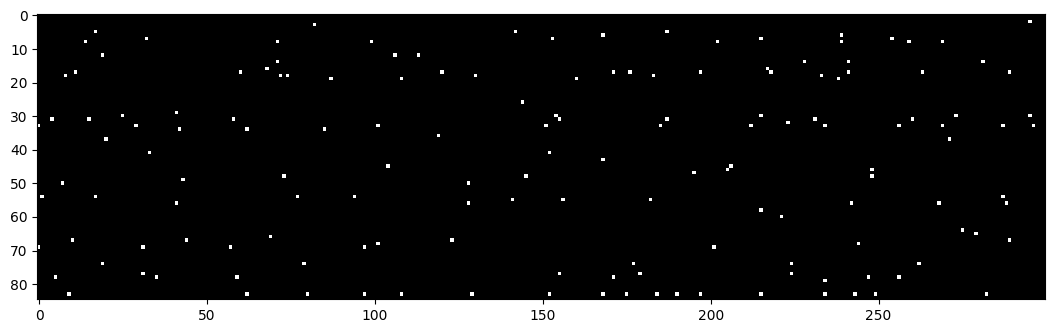

In [11]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow((data_trim>0)[:300, :].T, cmap='gray');

### checking we have the good t_s on each trial

In [12]:
for i_trial in range(N_trial):
    print('ts=', (np.isnan(data[:, :, i_trial]).sum(axis=1)<N_neurons).sum())
    if i_trial>10: break


ts= 1100
ts= 1200
ts= 800
ts= 900
ts= 900
ts= 1200
ts= 900
ts= 1200
ts= 1000
ts= 900
ts= 1100
ts= 800


In [13]:
mat73data_dict['t_s'][i_session]

array([1100., 1200.,  800., ...,  640.,  800.,  560.])

In [14]:
for i_trial, t_s in enumerate(mat73data_dict['t_s'][i_session]):
    t_s_obs = (np.isnan(data[:, :, i_trial]).sum(axis=1)<N_neurons).sum()
    if not(t_s_obs == t_s): print('trial', i_trial)

### checking we have the same neurons on each trial

In [15]:
for i_trial, t_s in enumerate(mat73data_dict['t_s'][i_session]):
    data_trimT = data[:int(t_s), :, i_trial]
data_trimT.shape

(560, 107)

In [16]:
active_neurons = np.isnan(data_trimT).sum(axis=0)==0
active_neurons

array([ True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False])

In [17]:
for i_trial, t_s in enumerate(mat73data_dict['t_s'][i_session]):
    data_trimT = data[:int(t_s), :, i_trial]
    print((np.isnan(data_trimT).sum(axis=0)==0).sum())
    if i_trial>10: break


85
87
91
92
97
97
97
99
99
99
99
99


### saving all to numpy arrays (generates huge files!)

In [18]:
str(path).replace('.mat', '.npy')

'/Users/laurentperrinet/quantic/grants/polychronies/RSG-spikepatterns/Data/G_Ready-Set_bin1ms_alignedReady.npy'

In [19]:
str(path)

'/Users/laurentperrinet/quantic/grants/polychronies/RSG-spikepatterns/Data/G_Ready-Set_bin1ms_alignedReady.mat'

In [23]:
DEBUG = True
for path in [G_path, H_path]:
    import mat73
    mat73data_dict = mat73.loadmat(path)
    N_session = len(mat73data_dict['D'])
    for i_session in range(N_session):
        data = mat73data_dict['D'][i_session]
        np.save(str(path).replace('.mat', f'_session={i_session}.npy'), data)
        if DEBUG and i_session>0: break

In [24]:
%ls -ltrh /Users/laurentperrinet/quantic/grants/Polychronies/RSG-spikepatterns/Data/

total 9138656
-rw-r--r--  1 laurentperrinet  staff   211M Jun 14 10:42 H_Ready-Set_bin1ms_alignedReady.mat
-rw-r--r--  1 laurentperrinet  staff   407M Jun 14 10:55 G_Ready-Set_bin1ms_alignedReady.mat
-rw-r--r--@ 1 laurentperrinet  staff   2.0K Jun 15 12:29 README.md
-rw-r--r--@ 1 laurentperrinet  staff   1.4G Jun 26 16:39 G_Ready-Set_bin1ms_alignedReady_session=0.npy
-rw-r--r--@ 1 laurentperrinet  staff   1.7G Jun 26 16:39 G_Ready-Set_bin1ms_alignedReady_session=1.npy
-rw-r--r--@ 1 laurentperrinet  staff   138M Jun 26 16:40 H_Ready-Set_bin1ms_alignedReady_session=0.npy
-rw-r--r--@ 1 laurentperrinet  staff   545M Jun 26 16:40 H_Ready-Set_bin1ms_alignedReady_session=1.npy
